In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.utils import check_metric

# Entendendo os dados

### train

- id: ID único por cliente
- Gender: Gênero do cliente
- Age: Idade do cliente
- Driving_License: 0 = Cliente não tem licença para dirigir, 1 = Cliente tem licença para dirigir
- Region_Code: Código único da região do cliente
- Previously_Insured: 1 = Cliente tem seguro de veículo, 0 = Cliente não tem seguro de veículo
- Vehicle_Age: Idade do veículo
- Vehicle_Damage: 1 = O cliente teve seu veículo danificado no passado. 0 = O cliente não teve seu veículo danificado no passado.
- Annual_Premium: O valor que o cliente precisa pagar como prêmio no ano
- PolicySalesChannel: Código para o canal de divulgação ao cliente por correio, telefone, pessoalmente, etc.
- Vintage: Número de dias que o cliente foi associado à empresa
- Response: 1 = Cliente está interessado, 0 = Cliente não está interessado

### test

- id: ID único por cliente
- Gender: Gênero do cliente
- Age: Idade do cliente
- Driving_License: 0 = Cliente não tem licença para dirigir, 1 = Cliente tem licença para dirigir
- Region_Code: Código único da região do cliente
- Previously_Insured: 1 = Cliente tem seguro de veículo, 0 = Cliente não tem seguro de veículo
- Vehicle_Age: Idade do veículo
- Vehicle_Damage: 1 = O cliente teve seu veículo danificado no passado. 0 = O cliente não teve seu veículo danificado no passado.
- Annual_Premium: O valor que o cliente precisa pagar como prêmio no ano
- PolicySalesChannel: Código para o canal de divulgação ao cliente por correio, telefone, pessoalmente, etc.
- Vintage: Número de dias que o cliente foi associado à empresa

### sample_submission

- id: ID único por cliente
- Response: 1 = Cliente está interessado, 0 = Cliente não está interessado

In [2]:
train = pd.read_csv("Database/train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
test = pd.read_csv("Database/test.csv")
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
validation = pd.read_csv("Database/sample_submission.csv")
validation.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [5]:
model = setup(data=train, target='Response', session_id=123)

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(381109, 12)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0860
ada,Ada Boost Classifier,0.8772,0.8516,0.0003,0.2936,0.0006,0.0004,0.0062,3.3880
gbc,Gradient Boosting Classifier,0.8772,0.8555,0.0001,0.3333,0.0002,0.0002,0.0047,9.7690
dummy,Dummy Classifier,0.8772,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0790
lr,Logistic Regression,0.8771,0.8100,0.0005,0.2527,0.0010,0.0006,0.0068,1.3100
lightgbm,Light Gradient Boosting Machine,0.8769,0.8569,0.0030,0.3636,0.0060,0.0040,0.0233,0.7940
lda,Linear Discriminant Analysis,0.8768,0.8338,0.0027,0.3305,0.0053,0.0033,0.0198,0.2350
rf,Random Forest Classifier,0.8667,0.8344,0.1226,0.3713,0.1843,0.1313,0.1556,10.0240
et,Extra Trees Classifier,0.8620,0.8269,0.1431,0.3491,0.2030,0.1417,0.1587,8.1300
svm,SVM - Linear Kernel,0.8617,0.0000,0.0232,0.1447,0.0353,0.0032,0.0038,4.1630


In [7]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

In [8]:
# Criando o modelo com o melhor modelo
lgbm = create_model('lightgbm')
print(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8769,0.8555,0.0024,0.3333,0.0048,0.0031,0.0192
1,0.8768,0.8570,0.0027,0.3333,0.0054,0.0034,0.0204
2,0.8770,0.8604,0.0024,0.4000,0.0049,0.0034,0.0231
3,0.8769,0.8548,0.0043,0.4118,0.0085,0.0059,0.0314
4,0.8770,0.8567,0.0031,0.4000,0.0061,0.0042,0.0259
5,0.8764,0.8558,0.0031,0.2439,0.0060,0.0030,0.0145
6,0.8768,0.8556,0.0024,0.3077,0.0048,0.0029,0.0176
7,0.8769,0.8589,0.0012,0.2500,0.0024,0.0012,0.0095
8,0.8773,0.8588,0.0052,0.5484,0.0103,0.0080,0.0442
9,0.8770,0.8557,0.0034,0.4074,0.0067,0.0047,0.0276


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [9]:
# Otimizando o modelo
tuned_lgbm = tune_model(lgbm)
print(tuned_lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8771,0.8554,0.0000,0.0000,0.0000,-0.0001,-0.0032
1,0.8772,0.8567,0.0006,1.0000,0.0012,0.0011,0.0231
2,0.8771,0.8606,0.0003,0.2000,0.0006,0.0002,0.0032
3,0.8772,0.8542,0.0027,0.5000,0.0055,0.0041,0.0299
4,0.8771,0.8559,0.0021,0.4667,0.0043,0.0031,0.0248
5,0.8772,0.8554,0.0012,0.5714,0.0024,0.0019,0.0221
6,0.8772,0.8556,0.0006,0.6667,0.0012,0.0010,0.0176
7,0.8773,0.8574,0.0012,0.8000,0.0024,0.0021,0.0283
8,0.8772,0.8586,0.0003,0.5000,0.0006,0.0005,0.0100
9,0.8773,0.8557,0.0012,0.8000,0.0024,0.0021,0.0283


LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [10]:
# Criando parâmetros para o tuning
params = {
    'n_estimators': np.arange(100,500,50),
    'max_depth': [-1,3,5,10],
    'num_leaves': np.arange(50,120,10)
}

params

{'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
 'max_depth': [-1, 3, 5, 10],
 'num_leaves': array([ 50,  60,  70,  80,  90, 100, 110])}

In [11]:
# Realizando o tunning do algoritmo
tuned_lgbm2 = tune_model(lgbm, custom_grid = params)
print(tuned_lgbm2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8770,0.8564,0.0119,0.4699,0.0232,0.0173,0.0591
1,0.8773,0.8575,0.0134,0.5238,0.0262,0.0202,0.0687
2,0.8776,0.8619,0.0134,0.5714,0.0262,0.0207,0.0735
3,0.8775,0.8561,0.0143,0.5529,0.0280,0.0219,0.0741
4,0.8774,0.8572,0.0113,0.5362,0.0221,0.0171,0.0641
5,0.8777,0.8570,0.0131,0.5972,0.0257,0.0205,0.0752
6,0.8772,0.8566,0.0116,0.4935,0.0227,0.0171,0.0608
7,0.8776,0.8596,0.0113,0.5968,0.0222,0.0177,0.0697
8,0.8776,0.8608,0.0119,0.5909,0.0233,0.0186,0.0710
9,0.8773,0.8564,0.0140,0.5169,0.0273,0.0210,0.0695


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=450, n_jobs=-1, num_leaves=60, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


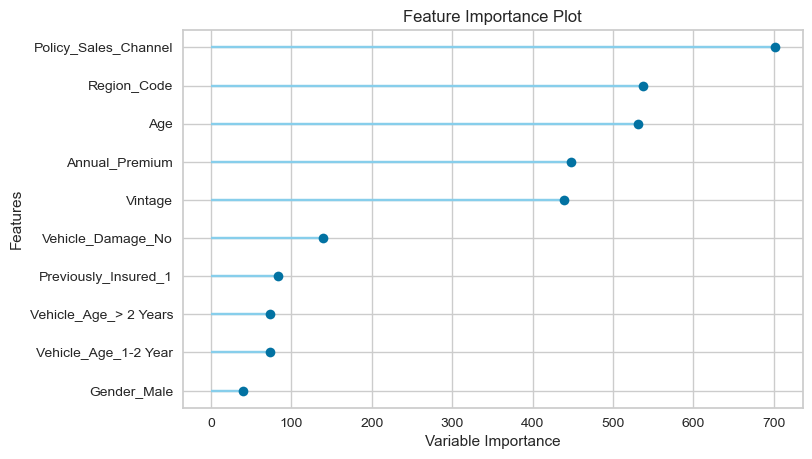

In [12]:
# plotando as principais features para o modelo
plot_model(tuned_lgbm2, plot='feature')

In [ ]:
# Predizendo a amostra de teste
predict_model(tuned_lgbm2)

In [ ]:
# Predição utilizando os dados de validação
validation_predictions = predict_model(tuned_lgbm2, data=test)
validation_predictions.head()

In [ ]:
# Verificando a performance do modelo aplicado aos dados de validação
check_metric(validation['Response'], validation_predictions['Label'], metric = 'Accuracy')

In [ ]:
# Treino do algoritmo e criação do modelo final
final_lgbm = finalize_model(tuned_lgbm2)
print(final_lgbm)

In [ ]:
# Salvando o modelo
save_model(final_lgbm,'Final LGBM Model')